## Scrape data for replies using Selenium

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary
from time import sleep
from selenium.webdriver.common.action_chains import ActionChains
from pymongo import MongoClient
from bson.objectid import ObjectId
from urllib.request import urlopen
import validators
from bs4 import BeautifulSoup

In [ ]:

def test1(t):
    # binary = FirefoxBinary('/usr/lib/firefox')
    # driver = webdriver.Firefox(firefox_binary=binary)
    driver = webdriver.Firefox()
    driver.get(t)
    replies = []
    old_num_threads = 0

    while(True):
        actions = ActionChains(driver)
        for _ in range(100):
            actions.send_keys(Keys.SPACE).perform()
            sleep(1)
        # driver.sen
#         print('scrolled')
        try:
            end_logo = driver.find_element_by_css_selector('div.stream-end-inner')
            if end_logo:
                break
        except:
            pass

    threads = driver.find_elements_by_css_selector('li.ThreadedConversation--loneTweet')
#     print('[Data Collector] total threads: {}'.format(len(threads)))
    for thread in threads:
        txt = thread.find_element_by_css_selector('p.tweet-text').text
        tweet_id = thread.find_element_by_css_selector('li.stream-item').get_attribute('data-item-id')
        screen_name = thread.find_element_by_css_selector('div.tweet.js-stream-tweet').get_attribute('data-screen-name')
        user_id=thread.find_element_by_css_selector('div.tweet.js-stream-tweet').get_attribute('data-user-id')
        timestamp = thread.find_element_by_css_selector('span._timestamp').get_attribute('data-time')
        replies.append((tweet_id, user_id, screen_name, txt, timestamp))

    elem = driver.find_element_by_css_selector("div.js-tweet-text-container")
    tweet_text = elem.text
    # driver.close()
    return replies




In [3]:
import pandas as pd
import numpy as np
import time

In [ ]:

backer=test1('https://twitter.com/lucianwintrich/status/968624706491428866')
backer[2]
d={'tweet_id':[i[0] for i in backer],'user_id':[i[1] for i in backer],'screen_name':[i[2] for i in backer],'text':[i[3] for i in backer],'time':[i[4] for i in backer]}
df=pd.DataFrame(data=d, columns=('tweet_id','user_id','screen_name','text','time'))
df.head(10)
df['time']=pd.to_datetime(df['time'],unit='s')
df.to_csv('backer1.csv',index=False)


# extract hiring data
hiring=test1('https://twitter.com/JacobAWohl/status/977697635837526016')
d={'tweet_id':[i[0] for i in hiring],'user_id':[i[1] for i in hiring],'screen_name':[i[2] for i in hiring],'text':[i[3] for i in hiring],'time':[i[4] for i in hiring]}
df=pd.DataFrame(data=d, columns=('tweet_id','user_id','screen_name','text','time'))
df['time']=pd.to_datetime(df['time'],unit='s')
df.to_csv('hiring.csv',index=False)

# extract coach data
coached=test1('https://twitter.com/lucianwintrich/status/966402885742481409')
d={'tweet_id':[i[0] for i in coached],'user_id':[i[1] for i in coached],'screen_name':[i[2] for i in coached],'text':[i[3] for i in coached],'time':[i[4] for i in coached]}
df=pd.DataFrame(data=d, columns=('tweet_id','user_id','screen_name','text','time'))
df['time']=pd.to_datetime(df['time'],unit='s')
df.to_csv('coached.csv',index=False)

# extract colton data
colton=test1('https://twitter.com/MarkDice/status/966550015408726016')
d={'tweet_id':[i[0] for i in colton],'user_id':[i[1] for i in colton],'screen_name':[i[2] for i in colton],'text':[i[3] for i in colton],'time':[i[4] for i in colton]}
df=pd.DataFrame(data=d, columns=('tweet_id','user_id','screen_name','text','time'))
df['time']=pd.to_datetime(df['time'],unit='s')
df.to_csv('colton.csv',index=False)

# extract march data
march=test1('https://twitter.com/AMarch4OurLives/status/977929937565892608')
march[2]
d={'tweet_id':[i[0] for i in march],'user_id':[i[1] for i in march],'screen_name':[i[2] for i in march],'text':[i[3] for i in march],'time':[i[4] for i in march]}
df=pd.DataFrame(data=d, columns=('tweet_id','user_id','screen_name','text','time'))
df['time']=pd.to_datetime(df['time'],unit='s')
df.to_csv('march.csv',index=False)

# extract march data
cnn=test1('https://twitter.com/Cernovich/status/966563984894713861')
d={'tweet_id':[i[0] for i in cnn],'user_id':[i[1] for i in cnn],'screen_name':[i[2] for i in cnn],'text':[i[3] for i in cnn],'time':[i[4] for i in cnn]}
df=pd.DataFrame(data=d, columns=('tweet_id','user_id','screen_name','text','time'))
df['time']=pd.to_datetime(df['time'],unit='s')
df.to_csv('cnn.csv',index=False)

# extract fbi data
FBI=test1('https://twitter.com/lucianwintrich/status/965720463476514817')
d={'tweet_id':[i[0] for i in FBI],'user_id':[i[1] for i in FBI],'screen_name':[i[2] for i in FBI],'text':[i[3] for i in FBI],'time':[i[4] for i in FBI]}
df=pd.DataFrame(data=d, columns=('tweet_id','user_id','screen_name','text','time'))
df['time']=pd.to_datetime(df['time'],unit='s')
df.to_csv('FBI.csv',index=False)


## Extract User Information

In [ ]:
import os
os.getcwd() #my current working project is within Python project instead of Pycharm Projects:
# 'C:\\Users\\tracy.shen\\Dropbox (AccuWeather)\\My Work\\Data Science\\Python'

os.chdir(r'C:\Users\tracy.shen\Dropbox (Personal)\Data Tools learning\Pycharm Projects')

import pandas as pdimport os

# ------using tweepy----
import tweepy

# ----sign in to twitter API----
consumer_key='2xHGxrsXiPmCN381odNUjwUZZ'
consumer_secret='XfXjfi1EEa0f3Iy0nAsEFgE5KsKzNUXpMs2bMTCp8zOF7TrPxl'
access_token='878214482-n8mUjb5cbbrkYTzG9EAo76ICORt1maJ5c421xStH'
access_token_secret='M4anl1LqP0yXtUtNArjM4fGRvcNBIlu2dK18nLqv6xhPP'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# it wouldn't accept below the second line
# auth=tweepy.OAuthHandler(consumer_key='2xHGxrsXiPmCN381odNUjwUZZ',consumer_secret='XfXjfi1EEa0f3Iy0nAsEFgE5KsKzNUXpMs2bMTCp8zOF7TrPxl')
# auth.set_access_token(access_token='878214482-n8mUjb5cbbrkYTzG9EAo76ICORt1maJ5c421xStH',access_token_secret='M4anl1LqP0yXtUtNArjM4fGRvcNBIlu2dK18nLqv6xhPP')
api = tweepy.API(auth)


# ---begin retweet user info extraction---

# march_rep=pd.read_csv('march_10.csv',encoding='ISO-8859-1')

retweets=pd.read_csv('retweet_merged.csv',encoding='ISO-8859-1')
retweets.head(10)
len(retweets)

march_ret=retweets[retweets['FakeNews']=='March']
march_ret.to_csv('march_retweeters.csv',index=False)
backer_ret=retweets[retweets['FakeNews']=='Backer']
backer_ret.to_csv('backer_retweeters.csv',index=False)
cnn_ret=retweets[retweets['FakeNews']=='backer']
cnn_ret.to_csv('backer_retweeters.csv',index=False)
coached_ret=retweets[retweets['FakeNews']=='Coached']
coached_ret.to_csv('coached_retweeters.csv',index=False)
colton_ret=retweets[retweets['FakeNews']=='Colton']
colton_ret.to_csv('colton_retweeters.csv',index=False)
fbi_ret=retweets[retweets['FakeNews']=='FBI']
fbi_ret.to_csv('fbi_retweeters.csv',index=False)
hiring_ret=retweets[retweets['FakeNews']=='Hiring']
hiring_ret.to_csv('hiring_retweeters.csv',index=False)

# ----try 10 retweet rows first-----
retweet_10=pd.read_csv('retweet_10.csv',encoding='UTF-8')
retweet_10.head(10)
# ---try march retweeters second---
march_ret=pd.read_csv('march_retweeters.csv',encoding='UTF-8')
backer_ret=pd.read_csv('backer_retweeters.csv',encoding='UTF-8')
# backer_ret.head(10)
hiring_ret=pd.read_csv('hiring_retweeters.csv',encoding='UTF-8')
cnn_ret=pd.read_csv('backer_retweeters.csv',encoding='UTF-8')
colton_ret=pd.read_csv('colton_retweeters.csv',encoding='UTF-8')
FBI_ret=pd.read_csv('fbi_retweeters.csv',encoding='UTF-8')
coached_ret=pd.read_csv('coached_retweeters.csv',encoding='UTF-8')


# -----EXTRACT USER INFO FROM RETWEETERS----
# run the below script for backer, hiring,cnn,colton, FBI and coached retweet datasets one by one, replace the name one by one
# the code below shares
# -----EXTRACT USER INFO FROM REPLIERS---
march_rep=pd.read_csv('march.csv',encoding='UTF-8')
backer_rep=pd.read_csv('backer1.csv',encoding='UTF-8')
# backer_rep.head(10)
hiring_rep=pd.read_csv('hiring.csv',encoding='UTF-8')
cnn_rep=pd.read_csv('cnn.csv',encoding='UTF-8')
colton_rep=pd.read_csv('colton.csv',encoding='UTF-8')
FBI_rep=pd.read_csv('FBI.csv',encoding='UTF-8')
coached_rep=pd.read_csv('coached.csv',encoding='UTF-8')

idStr=[]
Name=[]
screenName=[]
Location = []
# profileloc = []
descrip = []
protect = []
followerscount=[]
friendscount = []
listedcount = []
createdat = []
favoritescount = []
timezone = []
verif = []
statusescount = []
lan = []
# api.get_user('elizaportss',encoding='UTF-8')
march_rep.head(10)
for index, row in coached_rep.iterrows():
    try:
        user_info = api.get_user(row['screen_name'],encoding='UTF-8')
        id_str = user_info.id_str
        name = user_info.name
        screen_name = user_info.screen_name
        location = user_info.location
        # profile_location = user_info.profile_location
        description = user_info.description
        protected = user_info.protected
        followers_count = user_info.followers_count
        friends_count = user_info.friends_count
        listed_count = user_info.listed_count
        created_at = user_info.created_at
        favorites_count = user_info.favourites_count
        time_zone = user_info.time_zone
        verified = user_info.verified
        statuses_count = user_info.statuses_count
        lang = user_info.lang
        index+=1
        idStr.append(id_str)
        Name.append(name)
        screenName.append(screen_name)
        Location.append(location)
        # profileloc.append(profile_location)
        descrip.append(description)
        protect.append(protected)
        followerscount.append(followers_count)
        friendscount.append(friends_count)
        listedcount.append(listed_count)
        createdat.append(created_at)
        favoritescount.append(favorites_count)
        timezone.append(time_zone)
        verif.append(verified)
        statusescount.append(statuses_count)
        lan.append(lang)
    except:
        pass


coached_rep_info=pd.DataFrame({'id':idStr,'name':Name,'screen_name':screenName,'followers_count':followerscount,
                              'location':Location,'protected':protect,'description':descrip,
                              'friends_count':friendscount,'listed_count':listedcount,'created_time':createdat,
                              'favorites_count':favoritescount,'timezone':timezone,'verification':verif,'statuses_count':statusescount,'language':lan})
# repweet_10_info = pd.DataFrame({'id':idStr,'name':Name,'screen_name':screenName})
# coached_rep_info.head(10)
coached_rep_info.to_csv('coached_replier_info.csv',index=False,columns=['id','name','screen_name','location','protected','description','followers_count',
                                                              'friends_count','listed_count','created_time','favorites_count','timezone','verification',
                                                              'statuses_count','language'],sep=',',encoding='UTF-8')
# UTF-8 allows any character to be passed

FBI_ret_info

import csv

with open('FBI_rep_info.csv','w',newline='',encoding='utf-8') as csv_file:
    writer=csv.writer(csv_file,delimiter=';')
    writer.writerow(FBI_rep_info)


## Aggregate all the labels and find the majority vote stance

In [ ]:
all_results=pd.read_csv('all_results.csv',encoding='ISO-8859-1')
all_results=all_results.rename(columns={'Input.screen_name':'screen_name','Input.text':'text','Answer.Stance':'stance'})
# below is the trick does the work to aggregate by stance, text and screen name
all_results1=all_results.groupby(['screen_name','text','stance']).size().reset_index(name='count')

all_results1.to_csv('all_stance_agg.csv',index=False,encoding='utf-8')
all_results2=all_results1[all_results1['count']>=3]
all_results2.shape #(852,4)
all_results3=all_results2.drop_duplicates('text')
all_results3.shape #(768, 4)
all_results3.to_csv('majority_labeled_replies.csv',encoding='utf-8',index=False)
repl_unique_n=all_results3.drop_duplicates('screen_name')
repl_unique_n.shape #(748, 4), that means there are 20 users posted more than once.

## Read in all the replies data using unicode retaining emojis

In [ ]:
os.chdir(r'C:\Users\tracy.shen\Dropbox (Personal)\Data Tools learning\Pycharm Projects\replier_userInfo')
backer=pd.read_csv('backer_replier_info.csv',encoding='utf-8')
coached=pd.read_csv('coached_replier_info.csv',encoding='Windows-1252')
colton=pd.read_csv('colton_replier_info.csv',encoding='utf-8')
FBI=pd.read_csv('FBI_replier_info.csv',encoding='utf-8')
hiring=pd.read_csv('hiring_replier_info.csv',encoding='Windows-1252')
march=pd.read_csv('march_replier_info.csv',encoding='utf-8')
cnn=pd.read_csv('cnn_replier_info.csv',encoding='utf-8')
#  'utf-8' codec can't decode byte 0x80 , this is because the encoding is Windows-1252 and 0x80 is a euro sign

all_replies=pd.concat([backer,coached,colton,FBI,hiring,march,cnn])
all_replies.to_csv('all_repliers.csv',index=False)

## Join all the replies together

In [ ]:
os.chdir(r'C:\Users\tracy.shen\Dropbox (Personal)\Data Tools learning\Pycharm Projects\replies')
backer_r=pd.read_csv('backer1.csv',encoding='utf-8')
cnn_r=pd.read_csv('cnn.csv',encoding='utf-8')
coached_r=pd.read_csv('coached.csv',encoding='utf-8')
colton_r=pd.read_csv('colton.csv',encoding='utf-8')
FBI_r=pd.read_csv('FBI.csv',encoding='utf-8')
hiring_r=pd.read_csv('hiring.csv',encoding='utf-8')
march_r=pd.read_csv('march.csv',encoding='utf-8')
all_replies0=pd.concat([backer_r,cnn_r,march_r,coached_r,colton_r,hiring_r,FBI_r])
all_replies0.to_csv('all_replies.csv',index=False,encoding='utf-8')

## INNER JOIN the all_replies with all the labeled data

In [ ]:
os.chdir(r'C:\Users\tracy.shen\Dropbox (Personal)\Data Tools learning\Pycharm Projects')
labeled_replies=pd.merge(all_results3,all_replies0,on=['screen_name'])
labeled_replies=labeled_replies.drop_duplicates('text_x')
labeled_replies=labeled_replies.drop('text_y',axis=1)
labeled_replies=labeled_replies.rename(columns={'text_x':'text'})
labeled_replies.shape #(768, 10)
labeled_replies.to_csv('agglabel_join_replies.csv',index=False,encoding='utf-8')
majority_label=pd.merge(all_replies,labeled_replies,on=['screen_name','topic'])
all_results3.shape #(768, 4)
all_replies.shape#(926, 16)
majority_label.shape #((808, 23))
majority_label=majority_label.drop_duplicates('text')
majority_label.shape#(768, 23)
majority_label.to_csv('majority_labled_replier_info.csv',index=False,encoding='utf-8')


### Some Text Analysis

In [6]:
replier_majority_labled=pd.read_csv('majority_labled_replier_info.csv',encoding='utf-8')

replier_majority_labled.shape #(768, 23)
replier_majority_labled.head(10)

,id,name,screen_name,location,protected,description,followers_count,friends_count,listed_count,created_time,...,statuses_count,language,topic,text,stance,count,Unnamed: 0,tweet_id,user_id,time
0,8.137930e+17,cajungirl4ever 🌻❤🇺🇸,cajungirl4good,God's County Prolife 🙇🌻💅,False,Tattooed Mom and MeMe of 5🙇#LoveJesus 💖#Milita...,11102,10796,3,12/27/2016 17:05,...,18143,en,backer,Always knew these kids had ties to #Soros . Th...,Strong Agreement,3,0,9.688490e+17,8.137930e+17,2/28/2018 14:04
1,4.885703e+09,🇺🇸MAGA🇺🇸,izzieadams1,"Pensacola, FL",False,Retired Hoosier now FLORIDIAN/ LOVE GOD/HUBBY/...,16018,9948,42,2/10/2016 1:46,...,189181,en,backer,"Parents, if ur children are involved with Geor...",Strong Agreement,4,2,9.690330e+17,4.885703e+09,3/1/2018 2:12
2,3.146533e+09,Wesmoms,Wesmoms,Texas,False,"I was mom to Wesley, cutest Pomeranian ever. C...",1957,2118,1,4/8/2015 4:45,...,19454,en,backer,Why the hell is planned parenthood sponsoring ...,Neutral,3,3,9.688340e+17,3.146533e+09,2/28/2018 13:01
3,1.584294e+08,David T,DTNCA,"Santa Cruz, CA",False,Blind guy who sees more than most Attitude is ...,792,1063,41,6/22/2010 17:31,...,52191,en,backer,It all came together just a little too quickly...,Strong Agreement,5,4,9.690310e+17,1.584294e+08,3/1/2018 2:07
4,1.919084e+07,Jen,nerbonnej,Southern RI,False,"Mom of 3, #ProConstitution, #MAGA, Dog Lover 🐶...",5440,5073,3,1/19/2009 17:00,...,4807,en,backer,I bet if you do a little bit of research you w...,Weak Disagreement,3,5,9.688740e+17,1.919084e+07,2/28/2018 15:41
5,8.977974e+08,JJ,jjd_53,NaN,False,NaN,188,40,2,10/22/2012 15:16,...,11073,en,backer,Planned Parenthood is helping those kids! LMAO...,Weak Agreement,4,7,9.688650e+17,8.977974e+08,2/28/2018 15:05
6,9.341670e+17,Joyjoy,freedom_girlbot,NaN,False,True patriot🇺🇸🇺🇸 fighting 💪the gangster govern...,8587,5489,7,11/24/2017 21:09,...,6992,en,backer,"Poor kids , they should have parents that wat...",Neutral,3,9,9.689260e+17,9.341670e+17,2/28/2018 19:08
7,1.825501e+07,spectre2012,spectre2012,NaN,False,I follow everything and anything that can effe...,168,74,6,12/19/2008 22:56,...,3618,en,backer,Where is the minority representation more blac...,Neutral,5,11,9.688440e+17,1.825501e+07,2/28/2018 13:44
8,7.312570e+17,DorotheaV🇺🇸🌻🌵🤠,DoreeeV,"Arizona, USA",False,Best day Arizona Trump Rally sat in bleachers....,2180,1026,44,5/13/2016 22:57,...,188259,en,backer,Florida is his home base! He found more Useful...,Weak Agreement,3,12,9.688390e+17,7.312570e+17,2/28/2018 13:21
9,3.410222e+08,Janet Sullivan,JanCatt35,"Bon Air, VA",False,NaN,29,109,1,7/23/2011 17:36,...,671,en,backer,They all look SO saddened by the loss of their...,Neutral,3,13,9.688640e+17,3.410222e+08,2/28/2018 15:00


In [7]:

replier_majority_labled['text']=replier_majority_labled['text'].astype(str)
# to convert series to string, you have to use astype(str) to assign the type.
# ~~~~~~~~1. create word count using split(" ")~~~~~~~~~~
replier_majority_labled['word_count'] = replier_majority_labled['text'].apply(lambda x: len(x.split(" ")))
# use replier_majority_labled.dtypes to see all the data types.
replier_majority_labled[['text','word_count']].head()
#  lambda is unknown function, and some times you can assign function within lambda
# ~~~~~~~~~~2.count number of characters using str.len()~~~~~~~~
replier_majority_labled['char_count']=replier_majority_labled['text'].str.len()
replier_majority_labled.head(5)

,id,name,screen_name,location,protected,description,followers_count,friends_count,listed_count,created_time,...,topic,text,stance,count,Unnamed: 0,tweet_id,user_id,time,word_count,char_count
0,8.137930e+17,cajungirl4ever 🌻❤🇺🇸,cajungirl4good,God's County Prolife 🙇🌻💅,False,Tattooed Mom and MeMe of 5🙇#LoveJesus 💖#Milita...,11102,10796,3,12/27/2016 17:05,...,backer,Always knew these kids had ties to #Soros . Th...,Strong Agreement,3,0,9.688490e+17,8.137930e+17,2/28/2018 14:04,18,95
1,4.885703e+09,🇺🇸MAGA🇺🇸,izzieadams1,"Pensacola, FL",False,Retired Hoosier now FLORIDIAN/ LOVE GOD/HUBBY/...,16018,9948,42,2/10/2016 1:46,...,backer,"Parents, if ur children are involved with Geor...",Strong Agreement,4,2,9.690330e+17,4.885703e+09,3/1/2018 2:12,43,227
2,3.146533e+09,Wesmoms,Wesmoms,Texas,False,"I was mom to Wesley, cutest Pomeranian ever. C...",1957,2118,1,4/8/2015 4:45,...,backer,Why the hell is planned parenthood sponsoring ...,Neutral,3,3,9.688340e+17,3.146533e+09,2/28/2018 13:01,29,224
3,1.584294e+08,David T,DTNCA,"Santa Cruz, CA",False,Blind guy who sees more than most Attitude is ...,792,1063,41,6/22/2010 17:31,...,backer,It all came together just a little too quickly...,Strong Agreement,5,4,9.690310e+17,1.584294e+08,3/1/2018 2:07,21,140
4,1.919084e+07,Jen,nerbonnej,Southern RI,False,"Mom of 3, #ProConstitution, #MAGA, Dog Lover 🐶...",5440,5073,3,1/19/2009 17:00,...,backer,I bet if you do a little bit of research you w...,Weak Disagreement,3,5,9.688740e+17,1.919084e+07,2/28/2018 15:41,38,183


In [8]:
# ~~~~~~~~~3.avg. word length using a created function~~~~~~~~

def avg_word(text):
   words=text.split( )
   return sum(len(word) for word in words)/len(words)
# replier_majority_labled['text'] = replier_majority_labled['text'].astype(str)
replier_majority_labled['avg_word']=replier_majority_labled['text'].apply(lambda x: avg_word(x))
# the x in lambda is the variable before apply function
replier_majority_labled.head(5)

,id,name,screen_name,location,protected,description,followers_count,friends_count,listed_count,created_time,...,text,stance,count,Unnamed: 0,tweet_id,user_id,time,word_count,char_count,avg_word
0,8.137930e+17,cajungirl4ever 🌻❤🇺🇸,cajungirl4good,God's County Prolife 🙇🌻💅,False,Tattooed Mom and MeMe of 5🙇#LoveJesus 💖#Milita...,11102,10796,3,12/27/2016 17:05,...,Always knew these kids had ties to #Soros . Th...,Strong Agreement,3,0,9.688490e+17,8.137930e+17,2/28/2018 14:04,18,95,4.333333
1,4.885703e+09,🇺🇸MAGA🇺🇸,izzieadams1,"Pensacola, FL",False,Retired Hoosier now FLORIDIAN/ LOVE GOD/HUBBY/...,16018,9948,42,2/10/2016 1:46,...,"Parents, if ur children are involved with Geor...",Strong Agreement,4,2,9.690330e+17,4.885703e+09,3/1/2018 2:12,43,227,4.302326
2,3.146533e+09,Wesmoms,Wesmoms,Texas,False,"I was mom to Wesley, cutest Pomeranian ever. C...",1957,2118,1,4/8/2015 4:45,...,Why the hell is planned parenthood sponsoring ...,Neutral,3,3,9.688340e+17,3.146533e+09,2/28/2018 13:01,29,224,6.758621
3,1.584294e+08,David T,DTNCA,"Santa Cruz, CA",False,Blind guy who sees more than most Attitude is ...,792,1063,41,6/22/2010 17:31,...,It all came together just a little too quickly...,Strong Agreement,5,4,9.690310e+17,1.584294e+08,3/1/2018 2:07,21,140,5.714286
4,1.919084e+07,Jen,nerbonnej,Southern RI,False,"Mom of 3, #ProConstitution, #MAGA, Dog Lover 🐶...",5440,5073,3,1/19/2009 17:00,...,I bet if you do a little bit of research you w...,Weak Disagreement,3,5,9.688740e+17,1.919084e+07,2/28/2018 15:41,38,183,3.945946


In [10]:
# ~~~~~~~~~~~~5.number of hashtags and mentions~~~~~~~~~~~~~~~

replier_majority_labled['hastags']=replier_majority_labled['text'].apply(lambda x:len([x for x in x.split() if x.startswith('#')]))
replier_majority_labled.head(5)

replier_majority_labled['mentions']=replier_majority_labled['text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
replier_majority_labled.head(5)

# ~~~~6.number of digits~~~~~~~~

replier_majority_labled['number_digit']=replier_majority_labled['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
replier_majority_labled.head(5)

# ~~~~~~~~~~~~~~7.number of upper case~~~~~~~~~
replier_majority_labled['uppercase']=replier_majority_labled['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
replier_majority_labled.head(5)

# ~~~~basic cleaning: lower case every word using .join()~~~~
replier_majority_labled['lowercase']=replier_majority_labled['text'].apply(lambda x: len([x for x in x.split() if x.islower()]))
# replier_majority_labled.head(5)
replier_majority_labled.head(5)
# replier_majority_labled.dtypes

,id,name,screen_name,location,protected,description,followers_count,friends_count,listed_count,created_time,...,user_id,time,word_count,char_count,avg_word,hastags,mentions,number_digit,uppercase,lowercase
0,8.137930e+17,cajungirl4ever 🌻❤🇺🇸,cajungirl4good,God's County Prolife 🙇🌻💅,False,Tattooed Mom and MeMe of 5🙇#LoveJesus 💖#Milita...,11102,10796,3,12/27/2016 17:05,...,8.137930e+17,2/28/2018 14:04,18,95,4.333333,1,0,0,0,13
1,4.885703e+09,🇺🇸MAGA🇺🇸,izzieadams1,"Pensacola, FL",False,Retired Hoosier now FLORIDIAN/ LOVE GOD/HUBBY/...,16018,9948,42,2/10/2016 1:46,...,4.885703e+09,3/1/2018 2:12,43,227,4.302326,0,0,0,4,32
2,3.146533e+09,Wesmoms,Wesmoms,Texas,False,"I was mom to Wesley, cutest Pomeranian ever. C...",1957,2118,1,4/8/2015 4:45,...,3.146533e+09,2/28/2018 13:01,29,224,6.758621,3,0,0,1,24
3,1.584294e+08,David T,DTNCA,"Santa Cruz, CA",False,Blind guy who sees more than most Attitude is ...,792,1063,41,6/22/2010 17:31,...,1.584294e+08,3/1/2018 2:07,21,140,5.714286,0,0,0,0,20
4,1.919084e+07,Jen,nerbonnej,Southern RI,False,"Mom of 3, #ProConstitution, #MAGA, Dog Lover 🐶...",5440,5073,3,1/19/2009 17:00,...,1.919084e+07,2/28/2018 15:41,38,183,3.945946,0,0,0,2,34


In [32]:
replier_majority_labled.to_csv('majority_labled_replier_info.csv',index=False,encoding='utf-8')

In [ ]:
text_stance=replier_majority_labled[['stance', 'word_count', 'char_count', 'avg_word',
       'hastags', 'mentions', 'number_digit', 'uppercase', 'lowercase']]
text_by_stance=text_stance.groupby('stance').mean().reset_index()
text_by_stance.head()

In [28]:
###### text_stance.columns
col=['stance', 'word_count', 'char_count', 'hastags', 'mentions', 'uppercase']
output=text_by_stance[col]
output.rename(columns={'stance':'Class','hastags':'hashtags'},inplace=True)
output

,Class,word_count,char_count,hashtags,mentions,uppercase
0,Neutral,14.062780,84.349776,0.170404,0.349776,0.816143
1,Strong Agreement,18.266904,106.028470,0.487544,0.177936,1.067616
2,Strong Disagreement,19.126126,110.945946,0.090090,0.099099,0.684685
3,Weak Agreement,13.958763,78.835052,0.082474,0.041237,0.597938
4,Weak Disagreement,15.642857,88.017857,0.071429,0.035714,0.500000


In [31]:
(18.3/16.4,19.1/16.4)#(1.1158536585365855, 1.1646341463414636) for word count
(106/95.7,110.9/95.7)#(1.1076280041797282, 1.1588296760710555) for char count
(0.49/0.26,0.09/0.26) #(1.8846153846153846, 0.34615384615384615) for hashtags
(0.18/0.19,0.10/0.19)#(0.9473684210526315, 0.5263157894736842) for mentions
(1.07/0.84,0.68/0.84)# (1.273809523809524, 0.8095238095238096)  for upper case

(1.273809523809524, 0.8095238095238096)

In [17]:
text_stance.describe()

,word_count,char_count,avg_word,hastags,mentions,number_digit,uppercase,lowercase
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,16.434896,95.696615,5.386121,0.256510,0.188802,0.049479,0.838542,12.743490
std,13.187780,77.047305,2.773858,1.165826,0.848055,0.245214,2.038092,11.507068
min,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,35.750000,4.230769,0.000000,0.000000,0.000000,0.000000,4.000000
50%,12.000000,70.000000,4.779954,0.000000,0.000000,0.000000,0.000000,9.000000
75%,25.000000,139.250000,5.473837,0.000000,0.000000,0.000000,1.000000,20.000000
max,57.000000,342.000000,31.500000,23.000000,13.000000,2.000000,24.000000,52.000000


### Checking null values

In [6]:
replier_majority_labled.isnull().sum() #good

id                   0
name                 0
screen_name          0
location           252
protected            0
description        147
followers_count      0
friends_count        0
listed_count         0
created_time         0
favorites_count      0
timezone           768
verification         0
statuses_count       0
language             0
topic                0
text                 0
stance               0
count                0
Unnamed: 0           0
tweet_id             0
user_id              0
time                 0
dtype: int64

### Distribution of labels

In [19]:
pd.crosstab(index=replier_majority_labled['stance'],columns='count').reset_index()

col_0,count
stance,
Neutral,223
Strong Agreement,281
Strong Disagreement,111
Weak Agreement,97
Weak Disagreement,56


In [3]:
replier_majority_labled=pd.read_csv('replier_majority_labled.csv')

In [10]:
pd.crosstab(index=replier_majority_labled['stance'],columns='Percentage').apply(lambda r: round(r/len(replier_majority_labled),2)*100,axis=1).reset_index()

col_0,stance,Percentage
0,Neutral,29.0
1,Strong Agreement,37.0
2,Strong Disagreement,14.0
3,Weak Agreement,13.0
4,Weak Disagreement,7.0


### Topic Stance distribution

In [7]:
pd.crosstab(index=replier_majority_labled['stance'],columns=replier_majority_labled['topic'])

topic,FBI,backer,cnn,coached,colton,hiring,march
stance,,,,,,,
Neutral,33,35,90,17,20,16,12
Strong Agreement,51,16,7,39,100,30,38
Strong Disagreement,30,2,9,12,2,33,23
Weak Agreement,13,14,6,13,15,19,17
Weak Disagreement,2,2,11,2,2,15,22


In [8]:
pd.crosstab(index=replier_majority_labled['stance'],columns=replier_majority_labled['topic']).apply(lambda r: round(r/len(replier_majority_labled0['topic']),2),axis=1)

topic,FBI,backer,cnn,coached,colton,hiring,march
stance,,,,,,,
Neutral,0.05,0.05,0.13,0.02,0.03,0.02,0.02
Strong Agreement,0.07,0.02,0.01,0.05,0.14,0.04,0.05
Strong Disagreement,0.04,0.00,0.01,0.02,0.00,0.05,0.03
Weak Agreement,0.02,0.02,0.01,0.02,0.02,0.03,0.02
Weak Disagreement,0.00,0.00,0.02,0.00,0.00,0.02,0.03


In [74]:
pd.crosstab(index=replier_majority_labled['topic'],columns=replier_majority_labled['stance'])

stance,Neutral,Strong Agreement,Strong Disagreement,Weak Agreement,Weak Disagreement
topic,,,,,
FBI,33,51,30,13,2
backer,35,16,2,14,2
cnn,90,7,9,6,11
coached,17,39,12,13,2
colton,20,100,2,15,2
hiring,16,30,33,19,15
march,12,38,23,17,22


### Check relationship between stance and other variables 

In [77]:
# g1=sns.catplot(x='protected',y='stance',data=replier_majority_labled,kind='bar',height=6,palette='muted')
# g1.despine(left=True)
# g1=g1.set_ylabels('Stance Probability')

In [25]:
len(replier_majority_labled['location'].unique()) #354

354

#### location distribution

In [29]:
pd.crosstab(index=replier_majority_labled['location'],columns='count').sort_values('count',ascending=False)

col_0,count
location,
United States,35
"Florida, USA",11
"California, USA",8
"New York, USA",8
USA,8
"New Jersey, USA",6
"Texas, USA",6
"Arizona, USA",5
Texas,5


#### language: mainly in English

In [30]:
pd.crosstab(index=replier_majority_labled['language'],columns='count').sort_values('count',ascending=False)

col_0,count
language,
en,759
en-gb,3
nl,2
de,1
es,1
pt,1
zh-tw,1


#### create tweeting years and map the temporal trend

#### Binary code topic cnn, colton, publishing days 5,6,7,38,39, membership years 1 and 2

In [54]:
replier_majority_labled.columns


Index(['id', 'name', 'screen_name', 'location', 'protected', 'description',
       'followers_count', 'friends_count', 'listed_count', 'created_time',
       'favorites_count', 'timezone', 'verification', 'statuses_count',
       'language', 'topic', 'text', 'stance', 'count', 'Unnamed: 0',
       'tweet_id', 'user_id', 'time', 'word_count', 'char_count', 'avg_word',
       'hastags', 'mentions', 'number_digit', 'uppercase', 'lowercase',
       'publishing_time', 'publishing_days', 'membership_age',
       'membership_years', 'cnn', 'colton', 'pubd_5', 'pubd_6', 'pubd_7',
       'pubd_38', 'pubd_39', 'memb_1', 'memb_2'],
      dtype='object')

In [53]:
replier_majority_labled['membership_years']=replier_majority_labled['membership_years'].astype(str)
replier_majority_labled['publishing_days']=replier_majority_labled['publishing_days'].astype(str)
replier_majority_labled['cnn']=np.where(replier_majority_labled['topic']=='cnn',1,0)
replier_majority_labled['colton']=np.where(replier_majority_labled['topic']=='colton',1,0)
# replier_majority_labled['pubd_5']=np.where(replier_majority_labled['publishing_days']=='5',1,0)
replier_majority_labled.head(10)

replier_majority_labled['pubd_5']=np.where(replier_majority_labled['publishing_days']=='5',1,0)
replier_majority_labled['pubd_6']=np.where(replier_majority_labled['publishing_days']=='6',1,0)
replier_majority_labled['pubd_7']=np.where(replier_majority_labled['publishing_days']=='7',1,0)
replier_majority_labled['pubd_38']=np.where(replier_majority_labled['publishing_days']=='38',1,0)
replier_majority_labled['pubd_39']=np.where(replier_majority_labled['publishing_days']=='39',1,0)
replier_majority_labled['memb_1']=np.where(replier_majority_labled['membership_years']=='1',1,0)
replier_majority_labled['memb_2']=np.where(replier_majority_labled['membership_years']=='2',1,0)
replier_majority_labled.head(10)

,id,name,screen_name,location,protected,description,followers_count,friends_count,listed_count,created_time,...,membership_years,cnn,colton,pubd_5,pubd_6,pubd_7,pubd_38,pubd_39,memb_1,memb_2
0,8.137930e+17,cajungirl4ever 🌻❤🇺🇸,cajungirl4good,God's County Prolife 🙇🌻💅,False,Tattooed Mom and MeMe of 5🙇#LoveJesus 💖#Milita...,11102,10796,3,2016-12-27 00:17:05,...,2,0,0,0,0,0,0,0,0,1
1,4.885703e+09,🇺🇸MAGA🇺🇸,izzieadams1,"Pensacola, FL",False,Retired Hoosier now FLORIDIAN/ LOVE GOD/HUBBY/...,16018,9948,42,2016-02-10 00:01:46,...,3,0,0,0,0,0,0,0,0,0
2,3.146533e+09,Wesmoms,Wesmoms,Texas,False,"I was mom to Wesley, cutest Pomeranian ever. C...",1957,2118,1,2015-04-08 00:04:45,...,3,0,0,0,0,0,0,0,0,0
3,1.584294e+08,David T,DTNCA,"Santa Cruz, CA",False,Blind guy who sees more than most Attitude is ...,792,1063,41,2010-06-22 00:17:31,...,8,0,0,0,0,0,0,0,0,0
4,1.919084e+07,Jen,nerbonnej,Southern RI,False,"Mom of 3, #ProConstitution, #MAGA, Dog Lover 🐶...",5440,5073,3,2009-01-19 00:17:00,...,10,0,0,0,0,0,0,0,0,0
5,8.977974e+08,JJ,jjd_53,NaN,False,NaN,188,40,2,2012-10-22 00:15:16,...,6,0,0,0,0,0,0,0,0,0
6,9.341670e+17,Joyjoy,freedom_girlbot,NaN,False,True patriot🇺🇸🇺🇸 fighting 💪the gangster govern...,8587,5489,7,2017-11-24 00:21:09,...,1,0,0,0,0,0,0,0,1,0
7,1.825501e+07,spectre2012,spectre2012,NaN,False,I follow everything and anything that can effe...,168,74,6,2008-12-19 00:22:56,...,10,0,0,0,0,0,0,0,0,0
8,7.312570e+17,DorotheaV🇺🇸🌻🌵🤠,DoreeeV,"Arizona, USA",False,Best day Arizona Trump Rally sat in bleachers....,2180,1026,44,2016-05-13 00:22:57,...,2,0,0,0,0,0,0,0,0,1
9,3.410222e+08,Janet Sullivan,JanCatt35,"Bon Air, VA",False,NaN,29,109,1,2011-07-23 00:17:36,...,7,0,0,0,0,0,0,0,0,0


### Creating publishing days and membership years with outliers

In [52]:

replier_majority_labled['time']=pd.to_datetime(replier_majority_labled['time'],format='%m/%d/%Y %M:%S')
# replier_majority_labled.head(5)
# the shooting happens 2:30pm on Feb 14th 2018
then = dt.datetime(2018, 2, 14, 14, 30, 00)
replier_majority_labled['publishing_time']=replier_majority_labled['time']-then
replier_majority_labled.head(5)
replier_majority_labled['publishing_days']=replier_majority_labled['publishing_time'].map(lambda t:divmod(t.total_seconds(), 86400)[0]).astype(int)
# replier_majority_labled.head(5)
replier_majority_labled['created_time']=pd.to_datetime(replier_majority_labled['created_time'],format='%m/%d/%Y %M:%S')
dt.datetime.now()#AS OF 10/25/2018
replier_majority_labled['membership_age']=dt.datetime.now()-replier_majority_labled['created_time']
replier_majority_labled['membership_years']=replier_majority_labled['membership_age'].map(lambda t:divmod(t.total_seconds(), 31556926)[0]).astype(int)


### Creating publishing days and membership years After removing outliers

In [29]:
replier_majority_labled0['time']=pd.to_datetime(replier_majority_labled0['time'],format='%m/%d/%Y %M:%S')
# replier_majority_labled0.head(5)
# the shooting happens 2:30pm on Feb 14th 2018
then = dt.datetime(2018, 2, 14, 14, 30, 00)
replier_majority_labled0['publishing_time']=replier_majority_labled0['time']-then
replier_majority_labled0.head(5)
replier_majority_labled0['publishing_days']=replier_majority_labled0['publishing_time'].map(lambda t:divmod(t.total_seconds(), 86400)[0]).astype(int)
# replier_majority_labled0.head(5)
breplier_majority_labled0['created_time']=pd.to_datetime(replier_majority_labled0['created_time'],format='%m/%d/%Y %M:%S')
now=dt.datetime(2018,10,25,22,00,00)#AS OF 10/25/2018
replier_majority_labled0['membership_age']=now-replier_majority_labled0['created_time']
replier_majority_labled0['membership_years']=replier_majority_labled0['membership_age'].map(lambda t:divmod(t.total_seconds(), 31556926)[0]).astype(int)


In [55]:
replier_majority_labled.to_csv('replier_majority_labled.csv',index=False)
replier_majority_labled.head(10)

,id,name,screen_name,location,protected,description,followers_count,friends_count,listed_count,created_time,...,membership_years,cnn,colton,pubd_5,pubd_6,pubd_7,pubd_38,pubd_39,memb_1,memb_2
0,8.137930e+17,cajungirl4ever 🌻❤🇺🇸,cajungirl4good,God's County Prolife 🙇🌻💅,False,Tattooed Mom and MeMe of 5🙇#LoveJesus 💖#Milita...,11102,10796,3,2016-12-27 00:17:05,...,2,0,0,0,0,0,0,0,0,1
1,4.885703e+09,🇺🇸MAGA🇺🇸,izzieadams1,"Pensacola, FL",False,Retired Hoosier now FLORIDIAN/ LOVE GOD/HUBBY/...,16018,9948,42,2016-02-10 00:01:46,...,3,0,0,0,0,0,0,0,0,0
2,3.146533e+09,Wesmoms,Wesmoms,Texas,False,"I was mom to Wesley, cutest Pomeranian ever. C...",1957,2118,1,2015-04-08 00:04:45,...,3,0,0,0,0,0,0,0,0,0
3,1.584294e+08,David T,DTNCA,"Santa Cruz, CA",False,Blind guy who sees more than most Attitude is ...,792,1063,41,2010-06-22 00:17:31,...,8,0,0,0,0,0,0,0,0,0
4,1.919084e+07,Jen,nerbonnej,Southern RI,False,"Mom of 3, #ProConstitution, #MAGA, Dog Lover 🐶...",5440,5073,3,2009-01-19 00:17:00,...,10,0,0,0,0,0,0,0,0,0
5,8.977974e+08,JJ,jjd_53,NaN,False,NaN,188,40,2,2012-10-22 00:15:16,...,6,0,0,0,0,0,0,0,0,0
6,9.341670e+17,Joyjoy,freedom_girlbot,NaN,False,True patriot🇺🇸🇺🇸 fighting 💪the gangster govern...,8587,5489,7,2017-11-24 00:21:09,...,1,0,0,0,0,0,0,0,1,0
7,1.825501e+07,spectre2012,spectre2012,NaN,False,I follow everything and anything that can effe...,168,74,6,2008-12-19 00:22:56,...,10,0,0,0,0,0,0,0,0,0
8,7.312570e+17,DorotheaV🇺🇸🌻🌵🤠,DoreeeV,"Arizona, USA",False,Best day Arizona Trump Rally sat in bleachers....,2180,1026,44,2016-05-13 00:22:57,...,2,0,0,0,0,0,0,0,0,1
9,3.410222e+08,Janet Sullivan,JanCatt35,"Bon Air, VA",False,NaN,29,109,1,2011-07-23 00:17:36,...,7,0,0,0,0,0,0,0,0,0


In [7]:
pub=pd.crosstab(replier_majority_labled['publishing_days'],replier_majority_labled['stance'])
pub=pub.reset_index().sort_values('publishing_days')
pub

stance,publishing_days,Neutral,Strong Agreement,Strong Disagreement,Weak Agreement,Weak Disagreement
0,4,2,4,5,1,0
1,5,18,32,13,10,1
2,6,13,17,15,5,1
3,7,83,116,9,20,10
4,8,20,7,4,1,0
5,9,10,2,3,2,2
6,10,1,5,2,1,0
7,11,1,2,0,1,0
8,12,2,4,0,0,0
9,13,19,8,0,11,4


In [57]:
replier_majority_labled['membership_years']=replier_majority_labled['membership_years'].astype(str)
ct=pd.crosstab(replier_majority_labled['membership_years'],replier_majority_labled['stance'])
ct=ct.sort_values('Strong Agreement',ascending=False).reset_index()
ct

stance,membership_years,Neutral,Strong Agreement,Strong Disagreement,Weak Agreement,Weak Disagreement
0,1,45,63,10,18,9
1,2,27,43,5,12,7
2,9,33,32,23,12,10
3,6,18,27,7,6,2
4,0,22,24,9,9,3
5,3,13,22,6,6,3
6,5,19,22,12,10,6
7,4,13,18,8,10,6
8,8,10,17,8,6,5
9,7,16,12,18,8,3


### after removing outlier, the important features are still same for publishing days and membership years

In [ ]:
pub=pd.crosstab(replier_majority_labled0['publishing_days'],replier_majority_labled0['stance'])
pub=pub.reset_index().sort_values('publishing_days')
pub

In [ ]:
replier_majority_labled0['membership_years']=replier_majority_labled0['membership_years'].astype(str)
ct=pd.crosstab(replier_majority_labled0['membership_years'],replier_majority_labled0['stance'])
ct=ct.sort_values('Strong Agreement',ascending=False).reset_index()
# ct

### bar chart of labels

[Text(0, 0, 'Strong Agreement'),
 Text(0, 0, 'Neutral'),
 Text(0, 0, 'Weak Disagreement'),
 Text(0, 0, 'Weak Agreement'),
 Text(0, 0, 'Strong Disagreement')]

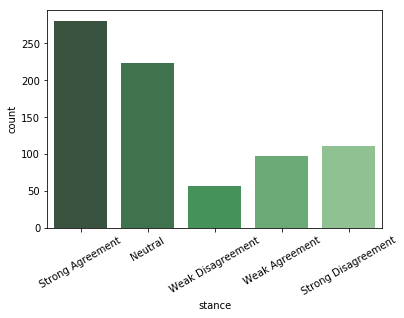

In [79]:
g3=sns.countplot(x='stance',data=replier_majority_labled,palette='Greens_d')
g3.set_xticklabels(g3.get_xticklabels(), rotation=30)

[Text(0, 0, 'Strong Agreement'),
 Text(0, 0, 'Neutral'),
 Text(0, 0, 'Strong Disagreement'),
 Text(0, 0, 'Weak Agreement'),
 Text(0, 0, 'Weak Disagreement')]

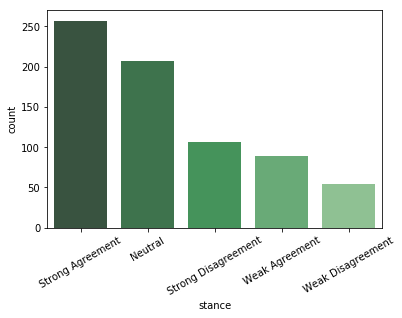

In [21]:
g3=sns.countplot(x='stance',data=replier_majority_labled0,palette='Greens_d',order=replier_majority_labled0['stance'].value_counts().index)
g3.set_xticklabels(g3.get_xticklabels(), rotation=30)

In [64]:
# g4=sns.pointplot(x='publishing_time',hue='stance',data=replier_majority_labled,linestyles='-')?

### Merge user, network and linguistic data together before Modeling

#### 1. load in user data and create new features

In [ ]:
replier_majority_labled=pd.read_csv('majority_labled_replier_info.csv',encoding='utf-8')

replier_majority_labled.shape #(768, 23)
replier_majority_labled.head(10)
replier_majority_labled['text']=replier_majority_labled['text'].astype(str)
# to convert series to string, you have to use astype(str) to assign the type.
# ~~~~~~~~1. create word count using split(" ")~~~~~~~~~~
replier_majority_labled['word_count'] = replier_majority_labled['text'].apply(lambda x: len(x.split(" ")))
# use replier_majority_labled.dtypes to see all the data types.
replier_majority_labled[['text','word_count']].head()
#  lambda is unknown function, and some times you can assign function within lambda
# ~~~~~~~~~~2.count number of characters using str.len()~~~~~~~~
replier_majority_labled['char_count']=replier_majority_labled['text'].str.len()
replier_majority_labled.head(5)


# ~~~~~~~~~~~~5.number of hashtags and mentions~~~~~~~~~~~~~~~

replier_majority_labled['hastags']=replier_majority_labled['text'].apply(lambda x:len([x for x in x.split() if x.startswith('#')]))
replier_majority_labled.head(5)

replier_majority_labled['mentions']=replier_majority_labled['text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
replier_majority_labled.head(5)

# ~~~~6.number of digits~~~~~~~~

replier_majority_labled['number_digit']=replier_majority_labled['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
replier_majority_labled.head(5)

# ~~~~~~~~~~~~~~7.number of upper case~~~~~~~~~
replier_majority_labled['uppercase']=replier_majority_labled['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
replier_majority_labled.head(5)

# ~~~~basic cleaning: lower case every word using .join()~~~~
replier_majority_labled['lowercase']=replier_majority_labled['text'].apply(lambda x: len([x for x in x.split() if x.islower()]))
# replier_majority_labled.head(5)
replier_majority_labled.head(5)
# replier_majority_labled.dtypes

replier_majority_labled.to_csv('majority_labled_replier_info.csv',index=False,encoding='utf-8')#the current version saved on 2/9/2019 has text features

replier_majority_labled['time']=pd.to_datetime(replier_majority_labled['time'],format='%m/%d/%Y %M:%S')
# replier_majority_labled.head(5)
# the shooting happens 2:30pm on Feb 14th 2018
then = dt.datetime(2018, 2, 14, 14, 30, 00)
replier_majority_labled['publishing_time']=replier_majority_labled['time']-then
replier_majority_labled.head(5)
replier_majority_labled['publishing_days']=replier_majority_labled['publishing_time'].map(lambda t:divmod(t.total_seconds(), 86400)[0]).astype(int)
# replier_majority_labled.head(5)
replier_majority_labled['created_time']=pd.to_datetime(replier_majority_labled['created_time'],format='%m/%d/%Y %M:%S')
dt.datetime.now()#AS OF 10/25/2018
replier_majority_labled['membership_age']=dt.datetime.now()-replier_majority_labled['created_time']
replier_majority_labled['membership_years']=replier_majority_labled['membership_age'].map(lambda t:divmod(t.total_seconds(), 31556926)[0]).astype(int)


replier_majority_labled['membership_years']=replier_majority_labled['membership_years'].astype(str)
replier_majority_labled['publishing_days']=replier_majority_labled['publishing_days'].astype(str)
replier_majority_labled['cnn']=np.where(replier_majority_labled['topic']=='cnn',1,0)
replier_majority_labled['colton']=np.where(replier_majority_labled['topic']=='colton',1,0)
# replier_majority_labled['pubd_5']=np.where(replier_majority_labled['publishing_days']=='5',1,0)
replier_majority_labled.head(10)

replier_majority_labled['pubd_5']=np.where(replier_majority_labled['publishing_days']=='5',1,0)
replier_majority_labled['pubd_6']=np.where(replier_majority_labled['publishing_days']=='6',1,0)
replier_majority_labled['pubd_7']=np.where(replier_majority_labled['publishing_days']=='7',1,0)
replier_majority_labled['pubd_38']=np.where(replier_majority_labled['publishing_days']=='38',1,0)
replier_majority_labled['pubd_39']=np.where(replier_majority_labled['publishing_days']=='39',1,0)
replier_majority_labled['memb_1']=np.where(replier_majority_labled['membership_years']=='1',1,0)
replier_majority_labled['memb_2']=np.where(replier_majority_labled['membership_years']=='2',1,0)
replier_majority_labled.head(10)

#### 2. load in network data(data_updated.csv) and process

In [14]:
network= pd.read_csv("data_updated.csv", index_col=0,encoding='utf-8')
network.head()

,screen_name,favorites_count,followers_count,friends_count,listed_count,statuses_count,scaled_followers,scaled_friends,influence,weighted_influence,...,triangles,avg_neighbor,majority_neighbor,repliers_cluster_coeff,repliers_closeness,repliers_clique_num,repliers_pagerank,repliers_degree_centrality,connected_to_Trump,connected_to_TheDailyShow
0,Sunshin68748888,6013,408,467,5,8217,0.001266,0.005827,0.873662,0.001106,...,332.0,0.000000,-999.0,0.00000,0.233343,2.0,0.000331,0.001110,1.0,0.0
1,TheLadyofLedger,1540,103,275,0,2851,0.000320,0.003431,0.374545,0.000120,...,0.0,-999.000000,-999.0,0.00000,0.000000,1.0,0.000240,0.000000,1.0,0.0
2,rockinrobyn59,47982,5016,4942,77,87919,0.015562,0.061665,1.014974,0.015795,...,41519.0,1.096774,2.0,0.36129,0.274105,9.0,0.002273,0.034406,1.0,0.0
3,Hotpep2706,797,5,26,0,1120,0.000016,0.000324,0.192308,0.000003,...,0.0,-999.000000,-999.0,0.00000,0.000000,1.0,0.000240,0.000000,0.0,0.0
4,DefaultNu,938,8,134,1,1308,0.000025,0.001672,0.059701,0.000001,...,0.0,-999.000000,-999.0,0.00000,0.000000,1.0,0.000240,0.000000,0.0,0.0


In [16]:
network['center_node']=np.where(network['screen_name'].isin(['adjunctprofessr','G_Pond47','jthunda65','MarshaPeters919','PaulHook_em', 'PennyHicks13','petefrt','TrumpWillWinnn' ]),1,0)
network.columns

Index(['screen_name', 'favorites_count', 'followers_count', 'friends_count',
       'listed_count', 'statuses_count', 'scaled_followers', 'scaled_friends',
       'influence', 'weighted_influence', 'cluster', 'clustering_coeff',
       'degree_centrality', 'closeness_centrality', 'label', 'cycle',
       'triangles', 'avg_neighbor', 'majority_neighbor',
       'repliers_cluster_coeff', 'repliers_closeness', 'repliers_clique_num',
       'repliers_pagerank', 'repliers_degree_centrality', 'connected_to_Trump',
       'connected_to_TheDailyShow', 'center_node'],
      dtype='object')

In [19]:
# network[network['center_node']==1].head()
# network['center_node'].unique()
network.to_csv('network_data.csv',index=False)

In [21]:
network= pd.read_csv("network_data.csv", index_col=0,encoding='utf-8')
network.describe()

network.drop(['favorites_count', 'followers_count', 'friends_count',
       'listed_count', 'statuses_count','label'],axis=1,inplace=True)
replier_majority_labled=pd.read_csv('replier_majority_labled.csv')
network_user=pd.merge(replier_majority_labled,network,on=['screen_name'])
network_user.shape#(768, 64)

(768, 64)

#### 3. load in linguistic data(liwc_truncate.csv) and merge

In [24]:
liwc=pd.read_csv('liwc_truncate.csv',encoding='utf-8')
liwc.drop(['Unnamed: 0','id', 'name',  'location', 'description','followers_count', 'friends_count', 'listed_count', 'created_time',
       'favorites_count', 'timezone', 'statuses_count', 'language', 'topic',
       'text', 'stance', 'count', 'Unnamed: 0.1', 'tweet_id', 'user_id',
       'time', 'publishing_time', 'publishing_days', 'membership_age',
       'membership_years' ],axis=True,inplace=True)
liwc.columns

Index(['screen_name', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS',
       'Sixltr', 'Dic', 'function', 'pronoun', 'ppron', 'i', 'you', 'shehe',
       'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj',
       'negate', 'verb', 'adj', 'compare', 'interrog', 'number', 'quant',
       'affect', 'posemo', 'negemo', 'anger', 'social', 'male', 'cogproc',
       'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'percept',
       'see', 'bio', 'drives', 'affiliation', 'achieve', 'power', 'reward',
       'focuspast', 'focuspresent', 'focusfuture', 'relativ', 'motion',
       'space', 'time.1', 'work', 'informal', 'AllPunc', 'Period', 'Comma',
       'QMark', 'Exclam', 'Apostro', 'OtherP'],
      dtype='object')

In [25]:
user_network_ling=pd.merge(network_user,liwc,on='screen_name')
np.array(user_network_ling.columns)

array(['id', 'name', 'screen_name', 'location', 'protected',
       'description', 'followers_count', 'friends_count', 'listed_count',
       'created_time', 'favorites_count', 'timezone', 'verification',
       'statuses_count', 'language', 'topic', 'text', 'stance', 'count',
       'Unnamed: 0', 'tweet_id', 'user_id', 'time', 'word_count',
       'char_count', 'avg_word', 'hastags', 'mentions', 'number_digit',
       'uppercase', 'lowercase', 'publishing_time', 'publishing_days',
       'membership_age', 'membership_years', 'cnn', 'colton', 'pubd_5',
       'pubd_6', 'pubd_7', 'pubd_38', 'pubd_39', 'memb_1', 'memb_2',
       'scaled_followers', 'scaled_friends', 'influence',
       'weighted_influence', 'cluster', 'clustering_coeff',
       'degree_centrality', 'closeness_centrality', 'cycle', 'triangles',
       'avg_neighbor', 'majority_neighbor', 'repliers_cluster_coeff',
       'repliers_closeness', 'repliers_clique_num', 'repliers_pagerank',
       'repliers_degree_centrality', 

In [26]:
# user_network_ling.to_csv('all_merged_full.csv',index=False)
user_network_ling0=user_network_ling.drop(['id', 'name', 'screen_name', 'location', 'protected',
       'description', 'Unnamed: 0', 'tweet_id', 'language','created_time', 'publishing_time','membership_age','topic','user_id', 'time','timezone', 'verification','text' ],axis=1)

np.array(user_network_ling0.columns)


array(['followers_count', 'friends_count', 'listed_count',
       'favorites_count', 'statuses_count', 'stance', 'count',
       'word_count', 'char_count', 'avg_word', 'hastags', 'mentions',
       'number_digit', 'uppercase', 'lowercase', 'publishing_days',
       'membership_years', 'cnn', 'colton', 'pubd_5', 'pubd_6', 'pubd_7',
       'pubd_38', 'pubd_39', 'memb_1', 'memb_2', 'scaled_followers',
       'scaled_friends', 'influence', 'weighted_influence', 'cluster',
       'clustering_coeff', 'degree_centrality', 'closeness_centrality',
       'cycle', 'triangles', 'avg_neighbor', 'majority_neighbor',
       'repliers_cluster_coeff', 'repliers_closeness',
       'repliers_clique_num', 'repliers_pagerank',
       'repliers_degree_centrality', 'connected_to_Trump',
       'connected_to_TheDailyShow', 'center_node', 'WC', 'Analytic',
       'Clout', 'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic', 'function',
       'pronoun', 'ppron', 'i', 'you', 'shehe', 'they', 'ipron',
       'article'

In [27]:
user_network_ling0.to_csv('all_merged_4training.csv',index=False)

#### 4. create training  network_user, user_ling, netork_ling dataset

In [28]:
network_user0=network_user.drop(['id', 'name', 'screen_name', 'location', 'protected', 'description','Unnamed: 0',
       'tweet_id', 'user_id', 'timezone', 'topic', 'text','created_time', 'language', 'publishing_time','membership_age','verification','time'],axis=1)
network_user0.columns

Index(['followers_count', 'friends_count', 'listed_count', 'favorites_count',
       'statuses_count', 'stance', 'count', 'word_count', 'char_count',
       'avg_word', 'hastags', 'mentions', 'number_digit', 'uppercase',
       'lowercase', 'publishing_days', 'membership_years', 'cnn', 'colton',
       'pubd_5', 'pubd_6', 'pubd_7', 'pubd_38', 'pubd_39', 'memb_1', 'memb_2',
       'scaled_followers', 'scaled_friends', 'influence', 'weighted_influence',
       'cluster', 'clustering_coeff', 'degree_centrality',
       'closeness_centrality', 'cycle', 'triangles', 'avg_neighbor',
       'majority_neighbor', 'repliers_cluster_coeff', 'repliers_closeness',
       'repliers_clique_num', 'repliers_pagerank',
       'repliers_degree_centrality', 'connected_to_Trump',
       'connected_to_TheDailyShow', 'center_node'],
      dtype='object')

In [29]:
network_user0.to_csv('network_user_4training.csv',index=False)

In [30]:
user_ling=pd.merge(replier_majority_labled,liwc,on=['screen_name'])
np.array(user_ling.columns)
user_ling0=user_ling.drop(['id', 'name', 'screen_name', 'location', 'protected',
       'description',  'language','timezone', 'publishing_time','membership_age','topic',  'verification', 'created_time','text', 'Unnamed: 0', 'tweet_id', 'user_id', 'time'],axis=1)
user_ling0.columns

Index(['followers_count', 'friends_count', 'listed_count', 'favorites_count',
       'statuses_count', 'stance', 'count', 'word_count', 'char_count',
       'avg_word', 'hastags', 'mentions', 'number_digit', 'uppercase',
       'lowercase', 'publishing_days', 'membership_years', 'cnn', 'colton',
       'pubd_5', 'pubd_6', 'pubd_7', 'pubd_38', 'pubd_39', 'memb_1', 'memb_2',
       'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic',
       'function', 'pronoun', 'ppron', 'i', 'you', 'shehe', 'they', 'ipron',
       'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj',
       'compare', 'interrog', 'number', 'quant', 'affect', 'posemo', 'negemo',
       'anger', 'social', 'male', 'cogproc', 'insight', 'cause', 'discrep',
       'tentat', 'certain', 'differ', 'percept', 'see', 'bio', 'drives',
       'affiliation', 'achieve', 'power', 'reward', 'focuspast',
       'focuspresent', 'focusfuture', 'relativ', 'motion', 'space', 'time.1',
       'work', 'i

In [31]:
user_ling0.to_csv('user_ling_4training.csv',index=False)

In [33]:
network_ling=user_network_ling0.drop(['followers_count', 'friends_count', 'listed_count', 'favorites_count',
       'statuses_count',    'count', 'word_count',
       'char_count', 'avg_word', 'hastags', 'mentions', 'number_digit',
       'uppercase', 'lowercase', 'publishing_days',
       'membership_years', 'cnn', 'colton', 'pubd_5',
       'pubd_6', 'pubd_7', 'pubd_38', 'pubd_39', 'memb_1', 'memb_2'],axis=1)
network_ling.columns

Index(['stance', 'scaled_followers', 'scaled_friends', 'influence',
       'weighted_influence', 'cluster', 'clustering_coeff',
       'degree_centrality', 'closeness_centrality', 'cycle', 'triangles',
       'avg_neighbor', 'majority_neighbor', 'repliers_cluster_coeff',
       'repliers_closeness', 'repliers_clique_num', 'repliers_pagerank',
       'repliers_degree_centrality', 'connected_to_Trump',
       'connected_to_TheDailyShow', 'center_node', 'WC', 'Analytic', 'Clout',
       'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic', 'function', 'pronoun',
       'ppron', 'i', 'you', 'shehe', 'they', 'ipron', 'article', 'prep',
       'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare',
       'interrog', 'number', 'quant', 'affect', 'posemo', 'negemo', 'anger',
       'social', 'male', 'cogproc', 'insight', 'cause', 'discrep', 'tentat',
       'certain', 'differ', 'percept', 'see', 'bio', 'drives', 'affiliation',
       'achieve', 'power', 'reward', 'focuspast', 'focuspresent',


In [34]:
network_ling.to_csv('network_ling_4training.csv',index=False)

#### create individual training datast for user, network and ling

In [102]:
replier_majority_labled.columns

Index(['id', 'name', 'screen_name', 'location', 'protected', 'description',
       'followers_count', 'friends_count', 'listed_count', 'created_time',
       'favorites_count', 'timezone', 'verification', 'statuses_count',
       'language', 'topic', 'text', 'stance', 'count', 'Unnamed: 0',
       'tweet_id', 'user_id', 'time', 'word_count', 'char_count', 'avg_word',
       'hastags', 'mentions', 'number_digit', 'uppercase', 'lowercase',
       'publishing_time', 'publishing_days', 'membership_age',
       'membership_years', 'cnn', 'colton', 'pubd_5', 'pubd_6', 'pubd_7',
       'pubd_38', 'pubd_39', 'memb_1', 'memb_2'],
      dtype='object')

In [37]:
user_t.to_csv('useronly_4training.csv',index=False)

In [38]:
network.columns

Index(['scaled_followers', 'scaled_friends', 'influence', 'weighted_influence',
       'cluster', 'clustering_coeff', 'degree_centrality',
       'closeness_centrality', 'cycle', 'triangles', 'avg_neighbor',
       'majority_neighbor', 'repliers_cluster_coeff', 'repliers_closeness',
       'repliers_clique_num', 'repliers_pagerank',
       'repliers_degree_centrality', 'connected_to_Trump',
       'connected_to_TheDailyShow', 'center_node'],
      dtype='object')

In [39]:
network_t=network_user.drop(['id', 'name', 'screen_name', 'location', 'protected', 'description','Unnamed: 0',
       'tweet_id', 'user_id', 'timezone', 'topic', 'text', 'language', 'publishing_time','membership_age','verification','time','followers_count', 'friends_count', 'listed_count', 'favorites_count',
       'statuses_count',  'count', 'word_count', 'char_count',
       'avg_word', 'hastags', 'mentions', 'number_digit', 'uppercase',
       'lowercase', 'publishing_days', 'membership_years', 'pubd_6', 'pubd_7',
       'pubd_38', 'pubd_39', 'memb_1', 'memb_2','created_time', 'cnn', 'colton', 'pubd_5'],axis=1)

network_t.columns

Index(['stance', 'scaled_followers', 'scaled_friends', 'influence',
       'weighted_influence', 'cluster', 'clustering_coeff',
       'degree_centrality', 'closeness_centrality', 'cycle', 'triangles',
       'avg_neighbor', 'majority_neighbor', 'repliers_cluster_coeff',
       'repliers_closeness', 'repliers_clique_num', 'repliers_pagerank',
       'repliers_degree_centrality', 'connected_to_Trump',
       'connected_to_TheDailyShow', 'center_node'],
      dtype='object')

In [40]:
network_t.to_csv('networkonly_4training.csv',index=False)

In [41]:
liwc.columns

Index(['screen_name', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS',
       'Sixltr', 'Dic', 'function', 'pronoun', 'ppron', 'i', 'you', 'shehe',
       'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj',
       'negate', 'verb', 'adj', 'compare', 'interrog', 'number', 'quant',
       'affect', 'posemo', 'negemo', 'anger', 'social', 'male', 'cogproc',
       'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'percept',
       'see', 'bio', 'drives', 'affiliation', 'achieve', 'power', 'reward',
       'focuspast', 'focuspresent', 'focusfuture', 'relativ', 'motion',
       'space', 'time.1', 'work', 'informal', 'AllPunc', 'Period', 'Comma',
       'QMark', 'Exclam', 'Apostro', 'OtherP'],
      dtype='object')

In [43]:
ling_t=network_ling.drop(['scaled_followers', 'scaled_friends', 'influence',
       'weighted_influence', 'cluster', 'clustering_coeff',
       'degree_centrality', 'closeness_centrality', 'cycle', 'triangles',
       'avg_neighbor', 'majority_neighbor', 'repliers_cluster_coeff',
       'repliers_closeness', 'repliers_clique_num', 'repliers_pagerank',
       'repliers_degree_centrality', 'connected_to_Trump',
       'connected_to_TheDailyShow','center_node',],axis=1)
ling_t.columns

Index(['stance', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS',
       'Sixltr', 'Dic', 'function', 'pronoun', 'ppron', 'i', 'you', 'shehe',
       'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj',
       'negate', 'verb', 'adj', 'compare', 'interrog', 'number', 'quant',
       'affect', 'posemo', 'negemo', 'anger', 'social', 'male', 'cogproc',
       'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'percept',
       'see', 'bio', 'drives', 'affiliation', 'achieve', 'power', 'reward',
       'focuspast', 'focuspresent', 'focusfuture', 'relativ', 'motion',
       'space', 'time.1', 'work', 'informal', 'AllPunc', 'Period', 'Comma',
       'QMark', 'Exclam', 'Apostro', 'OtherP'],
      dtype='object')

In [44]:
ling_t.to_csv('lingonly_4training.csv',index=False)

In [112]:
ling_t.head()

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,time.1,work,informal,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP
0,1,92.84,50.00,1.00,25.77,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00
1,17,97.02,88.03,1.00,25.77,8.50,11.76,76.47,41.18,5.88,...,5.88,0.00,0.00,17.65,11.76,0.00,0.0,0.0,0.00,5.88
2,43,35.82,99.00,1.00,1.00,10.75,18.60,81.40,48.84,13.95,...,2.33,0.00,9.30,16.28,6.98,6.98,0.0,0.0,0.00,2.33
3,29,83.44,98.06,11.50,1.00,9.67,34.48,82.76,41.38,10.34,...,3.45,0.00,3.45,37.93,0.00,3.45,6.9,0.0,3.45,10.34
4,21,67.14,68.29,68.01,25.77,21.00,42.86,85.71,42.86,4.76,...,4.76,9.52,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00


## 1. user feature alone

In [ ]:
replier_majority_labled=pd.read_csv('replier_majority_labled.csv')
replier_majority_labled.head(10)#27 columns

replier_majority_labled0=replier_majority_labled.drop(['description','timezone','id','membership_age','protected','verification',
                               'text','name','language','created_time','location',
                               'tweet_id','user_id','Unnamed: 0','time','publishing_time','count'],axis=1)

replier_majority_labled0.to_csv('replier_majority_labled0.csv',index=False)

replier_majority_labled0.dtypes